In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

In [3]:
sys.path.insert(1, "/Users/Jake/Projects/luvoir_hec_drm/scripts")

import spectroscopy

In [4]:
import smarter; smarter.utils.plot_setup()

In [20]:
drmx = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "A (APLC2)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

In [29]:
drmx.complete_spectrum_time??

In [25]:
drmx.cn.telescope.Tput_lam

In [22]:
drmA_APLC3 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "A (APLC3)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmA_APLC3.generate_exptime_table()

No exact match found
Using F5V for F3/F5V


/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:314: RuntimeWarning: divide by zero encountered in true_divide
  Csig = self.Cratio/SNRt
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:315: RuntimeWarning: divide by zero encountered in true_divide
  Asig = self.A/SNRt
/Users/Jake/Projects/luvoir_hec_drm/scripts/spectroscopy.py:1395: RuntimeWarning: divide by zero encountered in double_scalars
  t_snr = (wantsnr**2 - intercept) / slope
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:311: RuntimeWarning: invalid value encountered in multiply
  SNRt  = self.cp * Dt / np.sqrt((self.cp + roll_factor*self.cb) * Dt)
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:311: RuntimeWarning: invalid value encountered in true_divide
  SNRt  = self.cp * Dt / np.sqrt((self.cp + roll_factor*self.cb) * Dt)


No exact match found
Using F7IV for F7IV-V
No exact match found
Using G0V for G0.5IV
No exact match found
Using F7V for F7V:
No exact match found
Using G1V for G1.5Vb
No exact match found
Using G8IV for G8IV-V
No exact match found
Using M2V for M2
No exact match found
Using M2V for M2Vvar
No exact match found
Using G8V for G8Vvar
No exact match found
Using F0IV for F0IV/V
No exact match found
Using G0V for G0Vs
No exact match found
Using M5V for M5Ve
No exact match found
Using M0V for M0
No exact match found
Using G5V for G3/G5V
No exact match found
Using F7V for F6/F7V
No exact match found
Using K5V for K5
No exact match found
Using G5IV for G5IV-Vvar
No exact match found
Using K0V for G8/K0V


In [23]:
drmA_APLC3.cn.telescope.Tput_lam

(array([0.1  , 0.215, 0.24 , 0.27 , 0.305, 0.345, 0.38 , 0.43 , 0.485,
        0.55 , 0.625, 0.715, 0.805, 0.92 , 1.06 , 1.22 , 1.405, 1.62 ,
        1.87 , 2.16 , 2.405, 5.   ]),
 array([0.0691, 0.0691, 0.085 , 0.1054, 0.1281, 0.1491, 0.1281, 0.1376,
        0.2995, 0.3248, 0.2998, 0.2475, 0.1552, 0.2646, 0.3991, 0.4646,
        0.4857, 0.5044, 0.5173, 0.527 , 0.5334, 0.5334]))

In [34]:
# Get the channel specific telescope parameters
telescope = spectroscopy.default_luvoir(architecture="A (APLC)", channel="vis")

telescope.Tput_sep
telescope.C_sep

(array([ 3.346,  3.376,  3.408,  3.433,  3.495,  3.546,  3.587,  3.619,
         3.661,  3.869,  3.963,  4.137,  4.282,  4.654,  5.234,  6.077,
         6.933,  7.659,  8.23 ,  8.903,  9.666, 10.547, 11.386, 11.569,
        11.653, 11.717, 11.724, 11.761, 11.836, 11.89 , 11.893, 11.948,
        11.982, 12.004, 12.071]),
 array([9.186e-09, 5.960e-09, 3.860e-09, 2.586e-09, 1.774e-09, 1.175e-09,
        7.754e-10, 5.172e-10, 3.456e-10, 2.278e-10, 1.519e-10, 1.036e-10,
        6.988e-11, 3.809e-11, 7.111e-11, 4.584e-11, 6.765e-11, 5.294e-11,
        6.674e-11, 7.440e-11, 7.750e-11, 7.696e-11, 8.693e-11, 1.315e-10,
        2.024e-10, 3.011e-10, 4.417e-10, 6.503e-10, 9.632e-10, 1.435e-09,
        2.122e-09, 3.235e-09, 4.671e-09, 6.959e-09, 9.737e-09]))

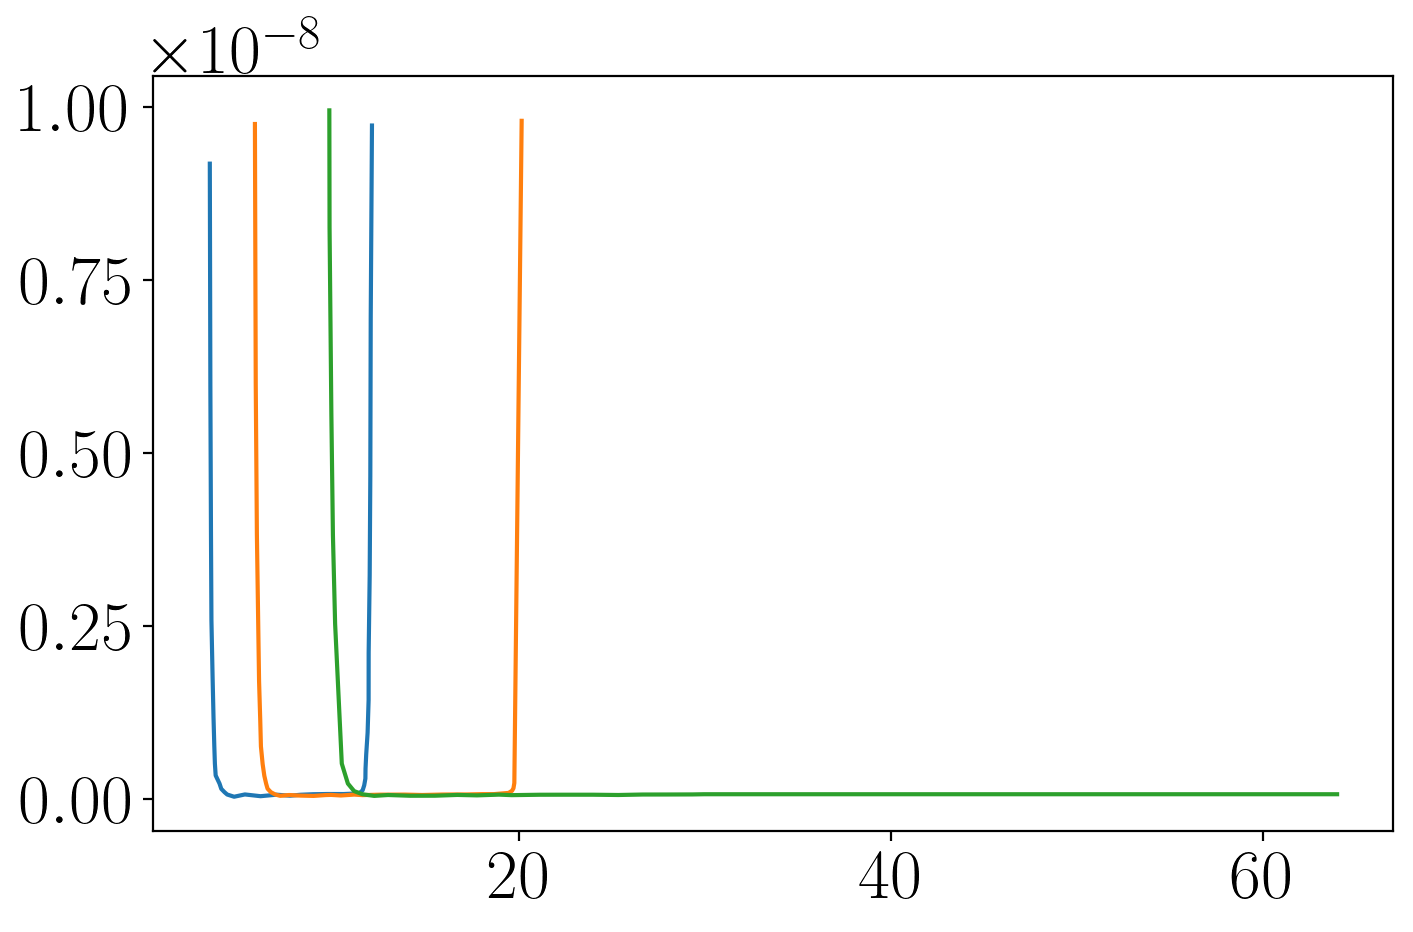

In [44]:
architectures = ["A (APLC1)", "A (APLC2)", "A (APLC3)"]

fig, ax = plt.subplots(fig)

for i, arch in enumerate(architectures):
    
    telescope = spectroscopy.default_luvoir(architecture=arch, channel="vis")

    telescope.Tput_sep
    telescope.C_sep
    
    plt.plot(telescope.C_sep[0], telescope.C_sep[1])

(1.3138927151532088e-11, 1e-07)

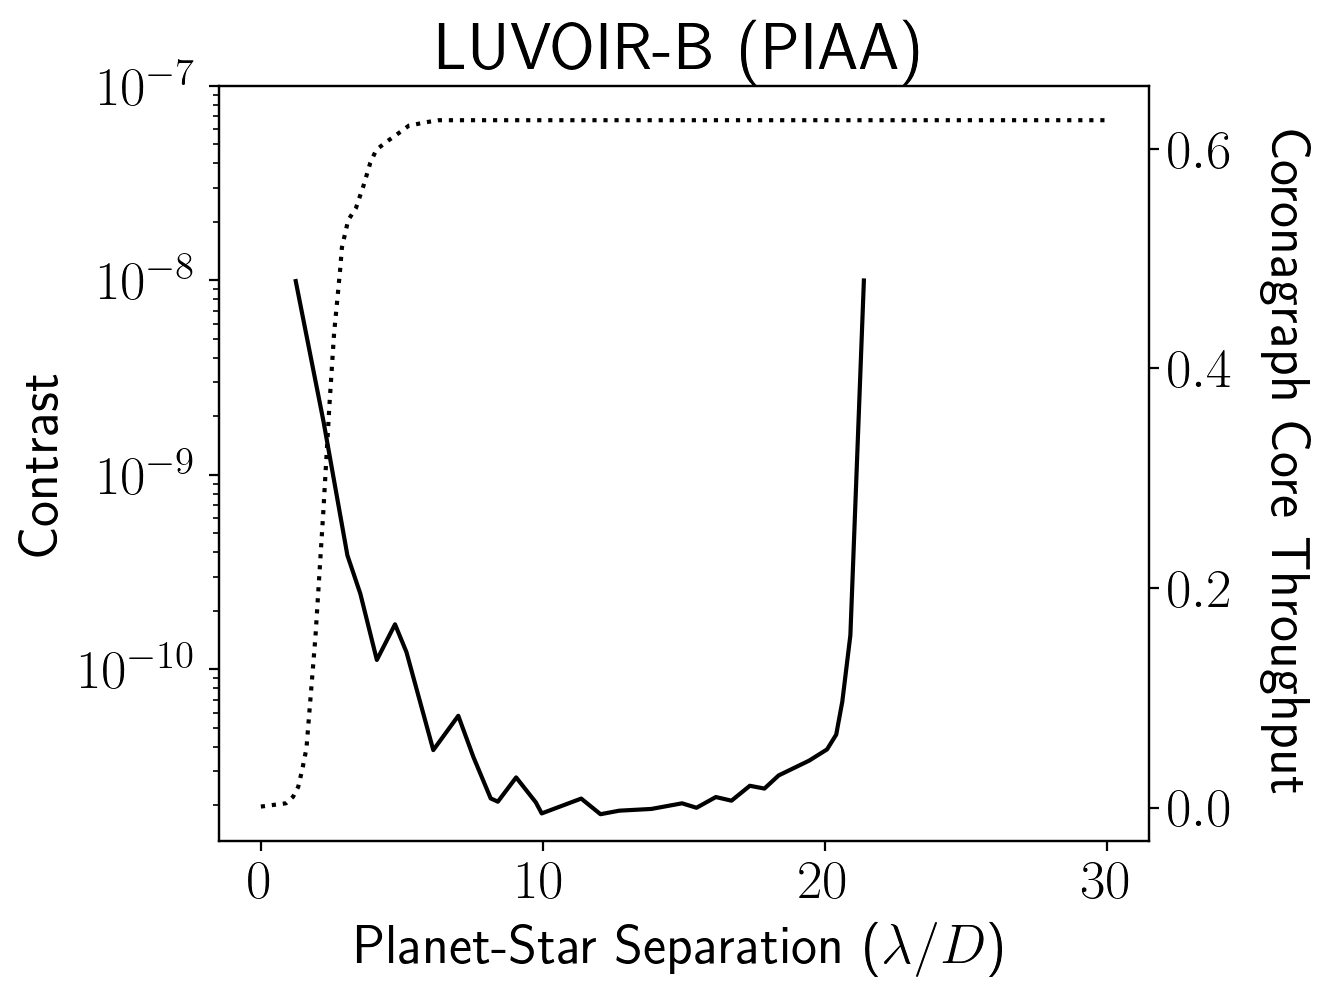

In [53]:
arch = "B (PIAA)"
color = "k"

telescope = spectroscopy.default_luvoir(architecture=arch, channel="vis")

fig, ax = plt.subplots(figsize = (6,5))
ax.set_xlabel("Planet-Star Separation ($\lambda / D$)")
ax.set_title("LUVOIR-B (PIAA)")

ax.set_ylabel("Contrast")
ax.set_yscale("log")
ax.plot(telescope.C_sep[0], telescope.C_sep[1], label = arch, color = color)

ax2 = ax.twinx()
ax2.set_ylabel("Coronagraph Core Throughput", rotation = 270, labelpad = 27)

ax2.plot(telescope.Tput_sep[0], telescope.Tput_sep[1], color = color, ls = "dotted")

ylim = ax.get_ylim()
ax.set_ylim(ylim)
ax.set_ylim(top = 1e-7)

#ax.legend(fontsize = 14)

(1.3560725371836877e-11, 1e-07)

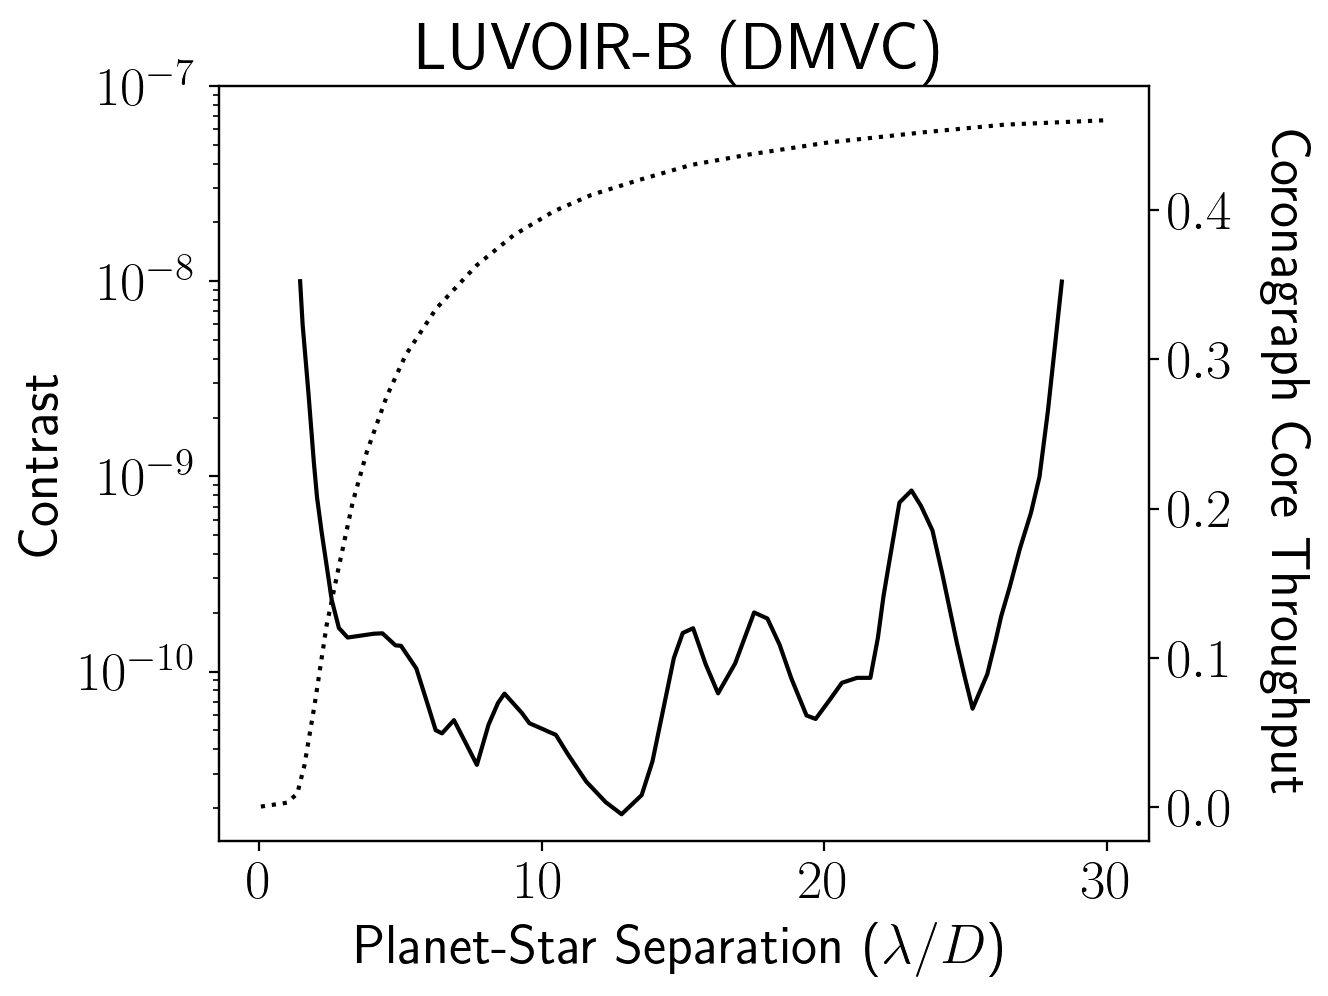

In [54]:
arch = "B (DMVC)"
color = "k"

telescope = spectroscopy.default_luvoir(architecture=arch, channel="vis")

fig, ax = plt.subplots(figsize = (6,5))
ax.set_xlabel("Planet-Star Separation ($\lambda / D$)")
ax.set_title("LUVOIR-B (DMVC)")

ax.set_ylabel("Contrast")
ax.set_yscale("log")
ax.plot(telescope.C_sep[0], telescope.C_sep[1], label = arch, color = color)

ax2 = ax.twinx()
ax2.set_ylabel("Coronagraph Core Throughput", rotation = 270, labelpad = 27)

ax2.plot(telescope.Tput_sep[0], telescope.Tput_sep[1], color = color, ls = "dotted")

ylim = ax.get_ylim()
ax.set_ylim(ylim)
ax.set_ylim(top = 1e-7)

#ax.legend(fontsize = 14)

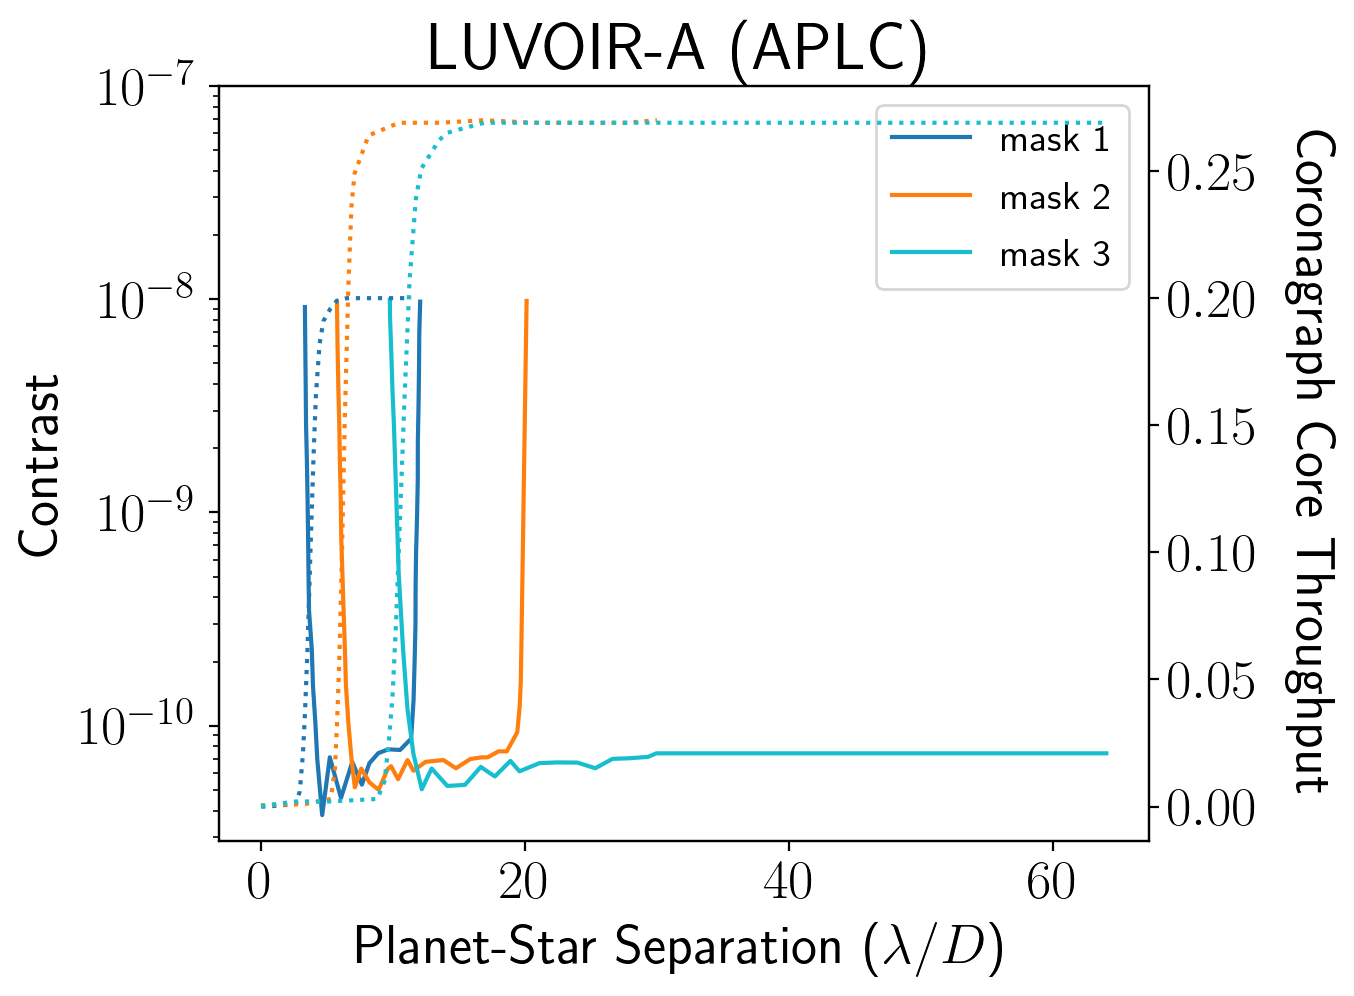

In [67]:
architectures = ["A (APLC1)", "A (APLC2)", "A (APLC3)"]
colors = ["C0", "C1", "C9"]

fig, ax = plt.subplots(figsize = (6,5))
ax.set_xlabel("Planet-Star Separation ($\lambda / D$)")
ax.set_title("LUVOIR-A (APLC)")
ax2 = ax.twinx()
ax2.set_ylabel("Coronagraph Core Throughput", rotation = 270, labelpad = 27)
ax.set_ylabel("Contrast")
ax.set_yscale("log")

for i, arch in enumerate(architectures): 

    telescope = spectroscopy.default_luvoir(architecture=arch, channel="vis")

    ax.plot(telescope.C_sep[0], telescope.C_sep[1], color = colors[i], label = "mask %i" %(i+1))
    ax2.plot(telescope.Tput_sep[0], telescope.Tput_sep[1], color = colors[i], ls = "dotted")

ylim = ax.get_ylim()
ax.set_ylim(ylim)
ax.set_ylim(top = 1e-7)

ax.legend(fontsize = 14)

In [106]:
mpl.cm.cividis(np.linspace(0,1,3))

array([[0.      , 0.135112, 0.304751, 1.      ],
       [0.488697, 0.485318, 0.471008, 1.      ],
       [0.995737, 0.909344, 0.217772, 1.      ]])

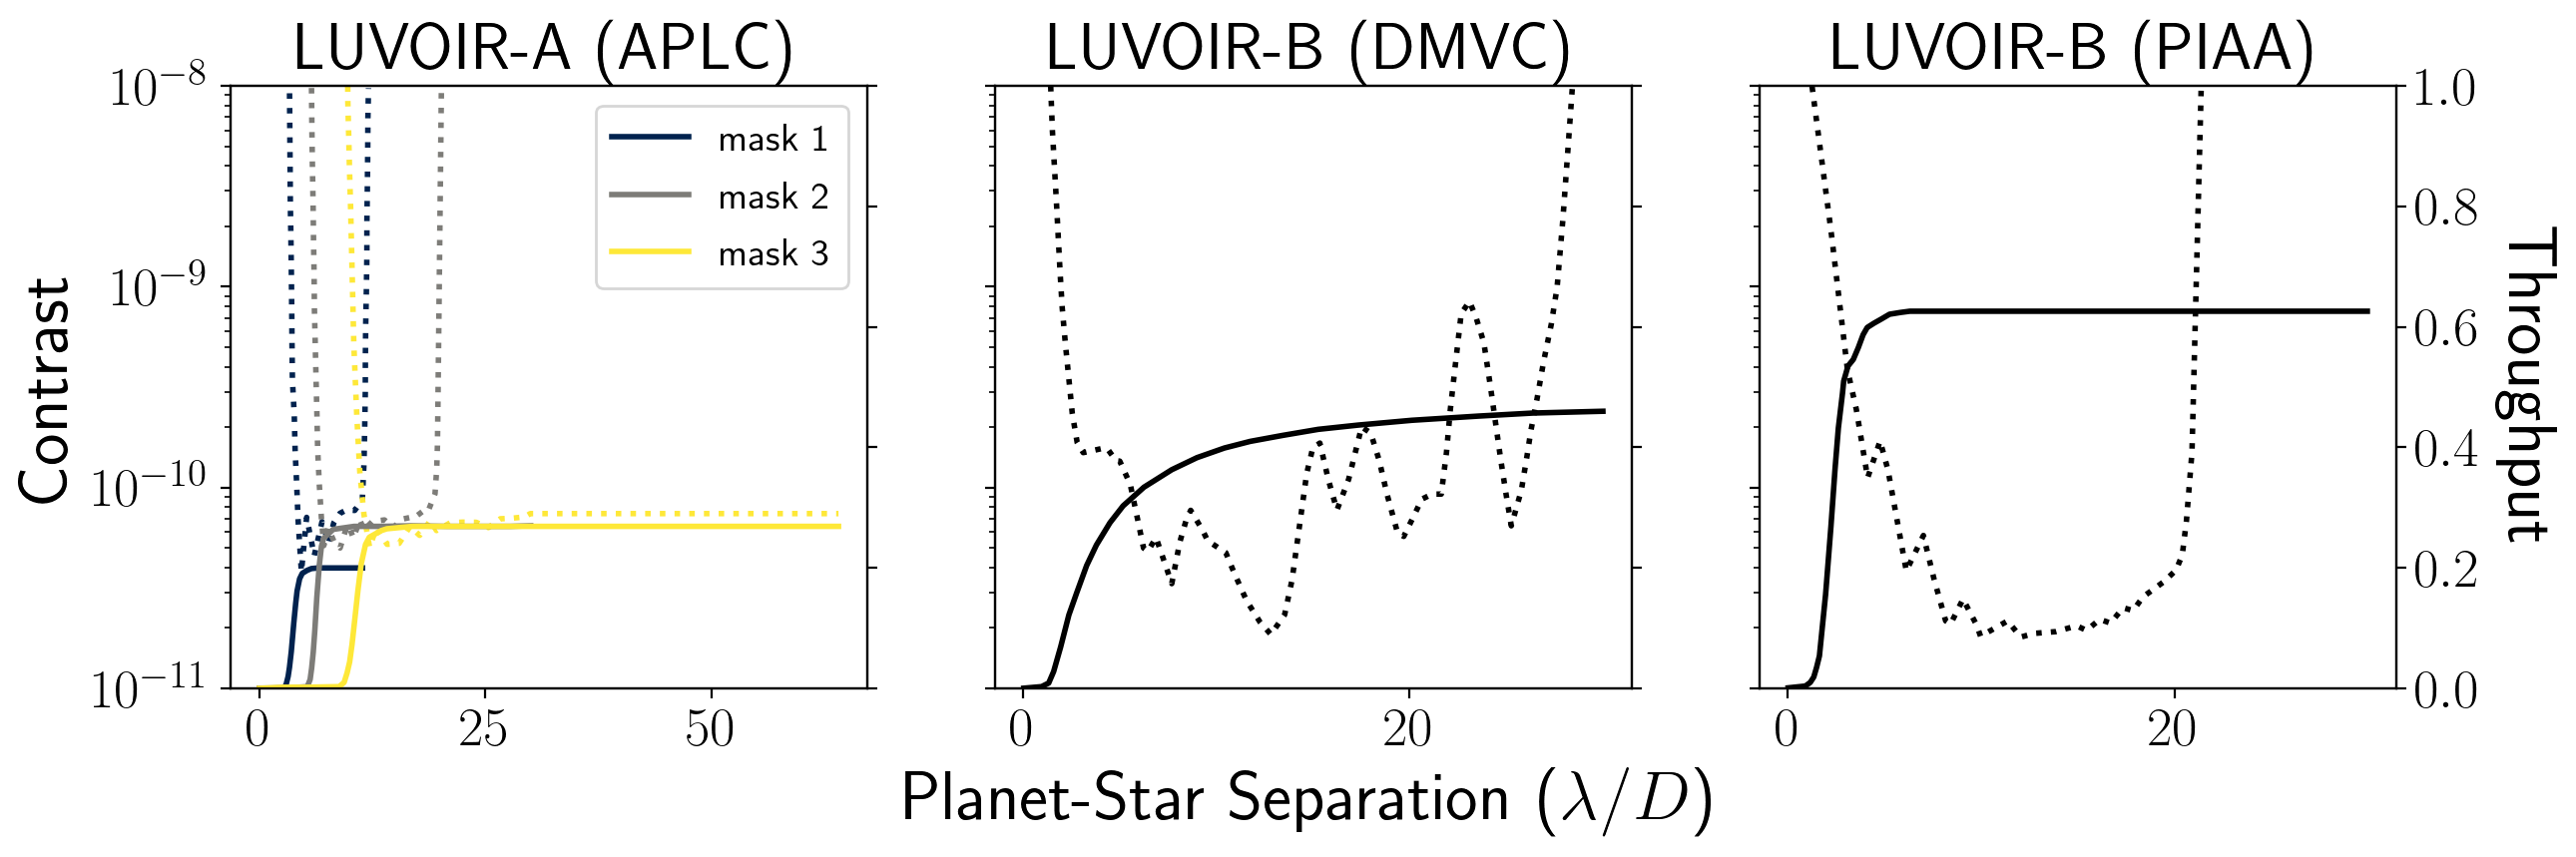

In [115]:
fig, axs = plt.subplots(1, 3, figsize = (14, 4)) 

ax = axs[0]
architectures = ["A (APLC1)", "A (APLC2)", "A (APLC3)"]
colors = mpl.cm.cividis(np.linspace(0,1,3))
#ax.set_xlabel("Planet-Star Separation ($\lambda / D$)")
ax.set_title("LUVOIR-A (APLC)")
ax2 = ax.twinx()
#ax2.set_ylabel("Coronagraph Core Throughput", rotation = 270, labelpad = 27)
ax.set_ylabel("Contrast", fontsize = 25)
ax.set_yscale("log")
for i, arch in enumerate(architectures): 
    telescope = spectroscopy.default_luvoir(architecture=arch, channel="vis")
    ax.plot(telescope.C_sep[0], telescope.C_sep[1], color = colors[i], ls = "dotted", lw = 2.0)
    ax2.plot(telescope.Tput_sep[0], telescope.Tput_sep[1], color = colors[i], ls = "-", label = "mask %i" %(i+1), lw=2.0)
ylim = ax.get_ylim()
ax.set_ylim(ylim)
ax.set_ylim(top = 1e-8)
ax2.set_ylim(0.0, 1.0)
ax2.set_yticklabels([])
ax.set_ylim(1e-11, 1e-8)
ax2.legend(fontsize = 14)

ax = axs[1]
arch = "B (DMVC)"
color = "k"
telescope = spectroscopy.default_luvoir(architecture=arch, channel="vis")
ax.set_xlabel("Planet-Star Separation ($\lambda / D$)", fontsize = 25)
ax.set_title("LUVOIR-B (DMVC)")
#ax.set_ylabel("Contrast")
ax.set_yscale("log")
ax.plot(telescope.C_sep[0], telescope.C_sep[1], label = arch, color = color, ls = "dotted", lw=2.0)
ax2 = ax.twinx()
#ax2.set_ylabel("Coronagraph Core Throughput", rotation = 270, labelpad = 27)
ax2.plot(telescope.Tput_sep[0], telescope.Tput_sep[1], color = color, ls = "-", lw=2.0)
ylim = ax.get_ylim()
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax2.set_ylim(0.0, 1.0)
ax2.set_yticklabels([])
ax.set_ylim(1e-11, 1e-8)

ax = axs[2]
arch = "B (PIAA)"
color = "k"
telescope = spectroscopy.default_luvoir(architecture=arch, channel="vis")
#ax.set_xlabel("Planet-Star Separation ($\lambda / D$)")
ax.set_title("LUVOIR-B (PIAA)")
#ax.set_ylabel("Contrast")
ax.set_yscale("log")
ax.plot(telescope.C_sep[0], telescope.C_sep[1], label = arch, color = color, ls = "dotted", lw=2.0)
ax2 = ax.twinx()
ax2.set_ylabel("Throughput", rotation = 270, labelpad = 27, fontsize = 25)
ax2.plot(telescope.Tput_sep[0], telescope.Tput_sep[1], color = color, ls = "-", lw=2.0)
ylim = ax.get_ylim()
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax2.set_ylim(0.0, 1.0)
ax.set_ylim(1e-11, 1e-8)

fig.savefig("/Users/Jake/Desktop/luvoir_coronagraph_contrasts.png", bbox_inches = "tight", dpi = 200)

In [5]:
# Set wavelength-dependent throughput for the optics
tpath = "../inputs/optical_throughput.txt"
data = np.genfromtxt(tpath, skip_header=1)
lam = 1e-3 * data[:,2]
Tput_optics = data[:,3]

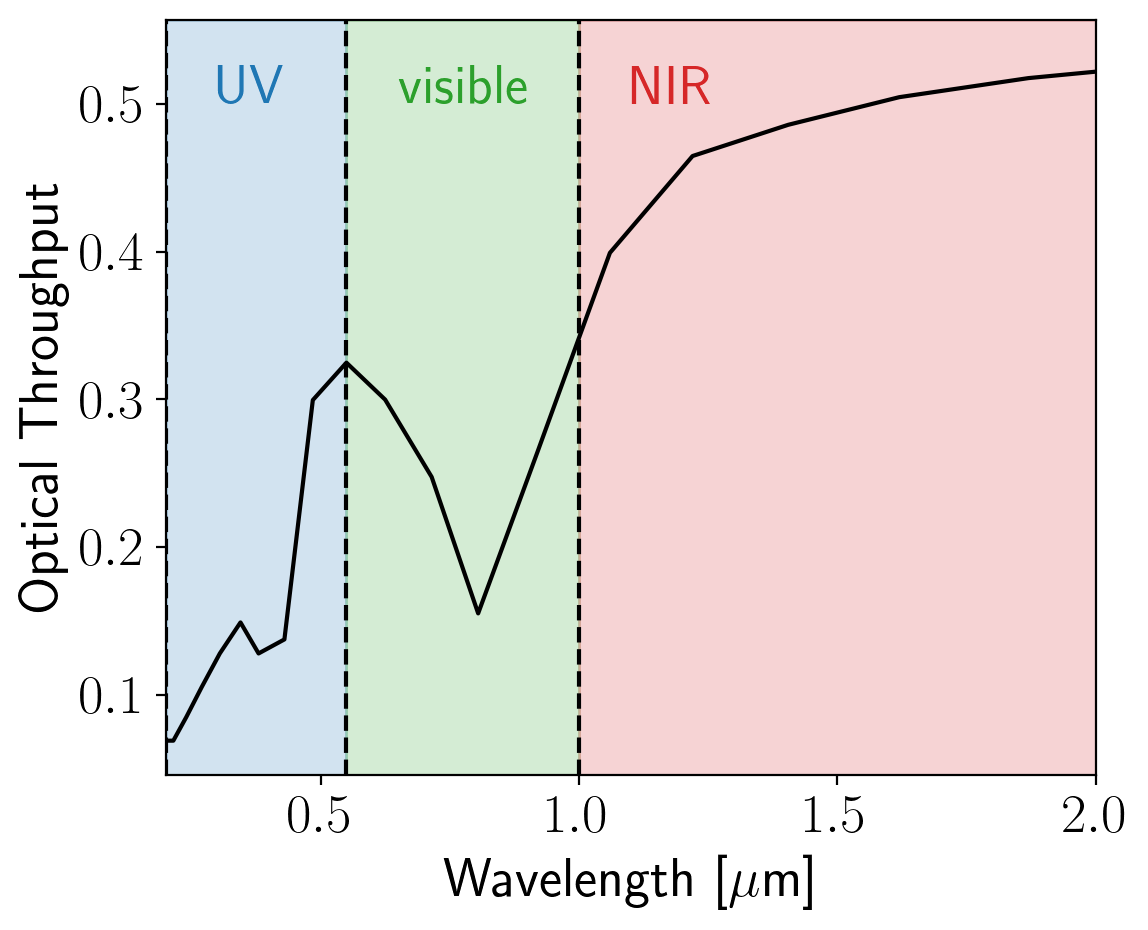

In [16]:
fig, ax = plt.subplots(figsize = (6,5))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Optical Throughput")

ax.plot(lam, Tput_optics, c="k")

ax.axvspan(0.2, 0.55, color = "C0", zorder = 0, alpha = 0.2)
ax.axvspan(0.55, 1.0, color = "C2", zorder = 0, alpha = 0.2)
ax.axvspan(1.0, 2.0, color = "C3", zorder = 0, alpha = 0.2)

ax.axvline(0.2, c="k", ls="dashed")
ax.axvline(0.55, c="k", ls="dashed")
ax.axvline(1.0, c="k", ls="dashed")

ax.text(0.3, 0.5, "UV", c="C0")
ax.text(0.65, 0.5, "visible", c="C2")
ax.text(1.1, 0.5, "NIR", c="C3")

ax.set_xlim(0.2, 2.0)

fig.savefig("/Users/Jake/Desktop/luvoir_optical_throughput.png", bbox_inches = "tight", dpi=200)

In [17]:
Tput_optics

array([0.0691, 0.0691, 0.085 , 0.1054, 0.1281, 0.1491, 0.1281, 0.1376,
       0.2995, 0.3248, 0.2998, 0.2475, 0.1552, 0.2646, 0.3991, 0.4646,
       0.4857, 0.5044, 0.5173, 0.527 , 0.5334, 0.5334])